In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import statistics
%matplotlib inline
from datetime import datetime
from pandas import Series
import warnings
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

import seaborn as sns
import os
import statistics

In [2]:
stat_info = pd.read_csv('D:\CASA\modules_2\Dissertation\publication\data\stat_info.csv')
stat_info.head()
stat_info['NEAR_FID'] = stat_info.FID
stat_info.head()

FID             Name                                         descriptio  \
0    0       Abbey Road  \r\n        <div>Zone 3</div>\r\n        <div>...   
1    1       Abbey Wood  \r\n        <div>Zone 4</div>\r\n        <div>...   
2    2    Acton Central  \r\n        <div>Zone 2</div>\r\n        <div>...   
3    3  Acton Main Line  \r\n        <div>Zone 3</div>\r\n        <div>...   
4    4       Acton Town  \r\n        <div>Zone 3</div>\r\n        <div>...   

  timestamp begin end altitudeMo  tessellate  extrude  visibility  drawOrder  \
0                                         -1        0          -1          0   
1                                         -1        0          -1          0   
2                                         -1        0          -1          0   
3                                         -1        0          -1          0   
4                                         -1        0          -1          0   

  icon  NEAR_FID  
0              0  
1              1  
2              2  
3              3  
4              4

In [3]:
dist0 = pd.read_csv('D:\CASA\modules_2\Dissertation\publication\data\dist.csv')
dist0.head()

FID  Field1  location  device excLSTM  \
0   79     187       871       0           
1   83     191       877       0           
2   81     189       873       0           
3    2       2         7       0  MovAvg   
4    1       1         6       0  MovAvg   

                                             address    city          region  \
0  Unit 25-26, Gloucester Arcade, Gloucester Road...  London  Greater London   
1  12 Electric Avenue, London, SW9 8JX, Greater L...  London  Greater London   
2  West One Shopping Centre, 375-381 Oxford Stree...  London  Greater London   
3  Unit 13-16, Hammersmith Broadway Shopping Cent...  London  Greater London   
4  Unit 11, Hammersmith Broadway Shopping Centre,...  London  Greater London   

        lat      lon                                           position  \
0  51.49467 -0.18352                                                      
1  51.46228 -0.11421                                                      
2  51.51431 -0.14920                                                      
3  51.49171 -0.22361                             Talgarth Road entrance   
4  51.49215 -0.22356  Hammersmith Underground Station - Talgarth Roa...   

       type  NEAR_FID  NEAR_DIST   dist  
0  External       223   0.000172  17.17  
1  External        73   0.000571  57.08  
2  External        62   0.000658  65.84  
3  External       246   0.000757  75.70  
4  External       246   0.000773  77.30

In [4]:
dist = pd.merge(dist0, stat_info, how = 'left', on = 'NEAR_FID')
dist = dist[['location','address','lat','lon','position','type','Name','dist']]
dist.head()

location                                            address       lat  \
0       871  Unit 25-26, Gloucester Arcade, Gloucester Road...  51.49467   
1       877  12 Electric Avenue, London, SW9 8JX, Greater L...  51.46228   
2       873  West One Shopping Centre, 375-381 Oxford Stree...  51.51431   
3         7  Unit 13-16, Hammersmith Broadway Shopping Cent...  51.49171   
4         6  Unit 11, Hammersmith Broadway Shopping Centre,...  51.49215   

       lon                                           position      type  \
0 -0.18352                                                     External   
1 -0.11421                                                     External   
2 -0.14920                                                     External   
3 -0.22361                             Talgarth Road entrance  External   
4 -0.22356  Hammersmith Underground Station - Talgarth Roa...  External   

                     Name   dist  
0         Gloucester Road  17.17  
1                 Brixton  57.08  
2             Bond Street  65.84  
3  Hammersmith (District)  75.70  
4  Hammersmith (District)  77.30

In [39]:
dist.to_csv('dist.csv')

### pre-processing of the tube station 15min aggregated counts

In [ ]:
tube_info = pd.read_csv('D:\CASA\modules_2\Dissertation\publication\data\ByQhrEntryExit_2018.csv')

tube_frame = pd.melt(tube_info, id_vars = ['Station',' day', ' dir'], 
                     value_vars = tube_info.columns[15:], 
                     var_name='timestamp', value_name='count')

for i in range(len(tube_frame.timestamp)):
    tube_frame.timestamp[i] = tube_frame.timestamp[i][0:4]

tube_frame['hour'] = 0
for i in range(len(tube_frame.hour)):
    tube_frame.hour[i] = tube_frame.timestamp[i][0:2]
    
tube_frame.to_csv('D:\CASA\modules_2\Dissertation\publication\data\ByhrEntryExit2018.csv')

## Auto Plot-Making Function

In [2]:
ff = pd.read_csv('stackfootfall.csv')
ff.timestamp = pd.to_datetime(ff.timestamp, format = '%Y-%m-%d %H:%M:%S') 

tube_frame = pd.read_csv('D:\CASA\modules_2\Dissertation\publication\data\ByhrEntryExit2018.csv')

In [3]:
corr = pd.DataFrame({'loc':[], 'stat':[], 'day':[], 'direct':[], 'corr':[]})
corr.to_csv('corr.csv')

In [4]:
plt.style.use('default')

In [5]:
def ComparisonPlot(loc, stat):
    corr = pd.read_csv('corr.csv', index_col = 0)
    fig,axs = plt.subplots(2,2, figsize=(18, 10))

    
    ff_case = ff.loc[(ff.location == loc) & (ff.timestamp >= '2018-09') & (ff.timestamp <= '2018-11-30')
                    ][['timestamp','footfall','year','month','day','hour','day_of_week']]
    ff_case.index = ff_case.timestamp
    
     ### location flow overview
#    ff_case['footfall'].plot(title = 'Footfall Counts per hour', fontsize = 14, linewidth = 2, ax = axs[0])
#    plt.xlabel('Datetime')
#    plt.ylabel('Footfall Counts')
#    plt.legend(loc = 'best')


    # location flow 
    ff_case = ff_case.resample('H').mean()
    ff_case['footfall'].replace(0, np.nan, inplace = True)
    ff_case['footfall'] = ff_case['footfall'].interpolate(method='linear')
    ff_case = ff_case.reset_index(level = ['timestamp'])
    ff_case.timestamp = pd.to_datetime(ff_case.timestamp, format = '%Y-%m-%d %H:%M:%S')

    temp = ff_case[['timestamp', 'footfall']]
    temp.index = temp.timestamp
    temp['hour'] = temp.timestamp.dt.hour
    temp['day_of_week'] = temp.timestamp.dt.dayofweek + 1
    temp
    ff_case = temp

    ff_case.loc[(ff_case.day_of_week >= 1) & (ff_case.day_of_week <= 4)].groupby('hour')['footfall'].mean().plot(
        title = 'Location ' + str(loc) + ' 5min Aggregated Counts by Hourly Mean',
        label = 'MTT', linewidth = 2, ax = axs[(0,0)])

    weekday = 5
    ff_case.loc[(ff_case.day_of_week == weekday)].groupby('hour')['footfall'].mean().plot(
        label = 'FRI', linewidth = 2, ax = axs[(0,0)])

    weekday = 6
    ff_case.loc[(ff_case.day_of_week == weekday)].groupby('hour')['footfall'].mean().plot(
        label = 'SAT', linewidth = 2, ax = axs[(0,0)])

    weekday = 7
    ff_case.loc[(ff_case.day_of_week == weekday)].groupby('hour')['footfall'].mean().plot(
        label = 'SUN', linewidth = 2, ax = axs[(0,0)])

    plt.legend(loc = 'best')


    # nearest tube station flow(in)
    direct = 'IN'

    day = 'MTT'
    tube_frame.loc[(tube_frame.Station == stat) & (tube_frame[' day'] == day) & 
                   (tube_frame[' dir'] == direct)].groupby('hour')['count'].mean().plot(
        title = stat + ' Tube Station 15min Aggregated Entry Counts by Hourly Mean',
        label = day, linewidth = 2, ax = axs[(1,0)])

    X =     X = ff_case.loc[(ff_case.day_of_week >= 1) & (ff_case.day_of_week <= 4)].groupby('hour')['footfall'].mean()
    Y = tube_frame.loc[(tube_frame.Station == stat) & (tube_frame[' day'] == day) 
                       & (tube_frame[' dir'] == direct)].groupby('hour')['count'].mean()
    corrcoef = X.corr(Y)
    corr = corr.append({'loc':loc, 'stat':stat, 'day':day, 'direct': direct,'corr':corrcoef },ignore_index=True)    
    
    
    day = 'FRI'
    tube_frame.loc[(tube_frame.Station == stat) & (tube_frame[' day'] == day) & 
                   (tube_frame[' dir'] == direct)].groupby('hour')['count'].mean().plot(
        label = day, linewidth = 2, ax = axs[(1,0)])

    X = ff_case.loc[(ff_case.day_of_week == 5)].groupby('hour')['footfall'].mean()
    Y = tube_frame.loc[(tube_frame.Station == stat) & (tube_frame[' day'] == day) 
                       & (tube_frame[' dir'] == direct)].groupby('hour')['count'].mean()
    corrcoef = X.corr(Y)
    corr = corr.append({'loc':loc, 'stat':stat, 'day':day, 'direct': direct,'corr':corrcoef },ignore_index=True)    
    
    
    day = 'SAT'
    tube_frame.loc[(tube_frame.Station == stat) & (tube_frame[' day'] == day) & 
                   (tube_frame[' dir'] == direct)].groupby('hour')['count'].mean().plot(
        label = day, linewidth = 2, ax = axs[(1,0)])

    X = ff_case.loc[(ff_case.day_of_week == 6)].groupby('hour')['footfall'].mean()
    Y = tube_frame.loc[(tube_frame.Station == stat) & (tube_frame[' day'] == day) 
                       & (tube_frame[' dir'] == direct)].groupby('hour')['count'].mean()
    corrcoef = X.corr(Y)
    corr = corr.append({'loc':loc, 'stat':stat, 'day':day, 'direct': direct,'corr':corrcoef },ignore_index=True)    
    
    
    day = 'SUN'
    tube_frame.loc[(tube_frame.Station == stat) & (tube_frame[' day'] == day) & 
                   (tube_frame[' dir'] == direct)].groupby('hour')['count'].mean().plot(
        label = day, linewidth = 2, ax = axs[(1,0)])

    X = ff_case.loc[(ff_case.day_of_week == 7)].groupby('hour')['footfall'].mean()
    Y = tube_frame.loc[(tube_frame.Station == stat) & (tube_frame[' day'] == day) 
                       & (tube_frame[' dir'] == direct)].groupby('hour')['count'].mean()
    corrcoef = X.corr(Y)
    corr = corr.append({'loc':loc, 'stat':stat, 'day':day, 'direct': direct,'corr':corrcoef },ignore_index=True)    

    
    
    # nearest tube station flow(out)
    direct = 'OUT'

    day = 'MTT'
    tube_frame.loc[(tube_frame.Station == stat) & (tube_frame[' day'] == day) & 
                   (tube_frame[' dir'] == direct)].groupby('hour')['count'].mean().plot(
        title = stat + ' Tube Station 15min Aggregated Exit Counts by Hourly Mean',
        label = day, linewidth = 2, ax = axs[(1,1)])

    X = ff_case.loc[(ff_case.day_of_week >= 1) & (ff_case.day_of_week <= 4)].groupby('hour')['footfall'].mean()
    Y = tube_frame.loc[(tube_frame.Station == stat) & (tube_frame[' day'] == day) 
                       & (tube_frame[' dir'] == direct)].groupby('hour')['count'].mean()
    corrcoef = X.corr(Y)
    corr = corr.append({'loc':loc, 'stat':stat, 'day':day, 'direct': direct, 'corr':corrcoef },ignore_index=True)
        
    
    day = 'FRI'
    tube_frame.loc[(tube_frame.Station == stat) & (tube_frame[' day'] == day) & 
                   (tube_frame[' dir'] == direct)].groupby('hour')['count'].mean().plot(
        label = day, linewidth = 2, ax = axs[(1,1)])

    X = ff_case.loc[(ff_case.day_of_week == 5)].groupby('hour')['footfall'].mean()
    Y = tube_frame.loc[(tube_frame.Station == stat) & (tube_frame[' day'] == day) 
                       & (tube_frame[' dir'] == direct)].groupby('hour')['count'].mean()
    corrcoef = X.corr(Y)
    corr = corr.append({'loc':loc, 'stat':stat, 'day':day, 'direct': direct,'corr':corrcoef },ignore_index=True)    
    
    
    day = 'SAT'
    tube_frame.loc[(tube_frame.Station == stat) & (tube_frame[' day'] == day) & 
                   (tube_frame[' dir'] == direct)].groupby('hour')['count'].mean().plot(
        label = day, linewidth = 2, ax = axs[(1,1)])

    X = ff_case.loc[(ff_case.day_of_week == 6)].groupby('hour')['footfall'].mean()
    Y = tube_frame.loc[(tube_frame.Station == stat) & (tube_frame[' day'] == day) 
                       & (tube_frame[' dir'] == direct)].groupby('hour')['count'].mean()
    corrcoef = X.corr(Y)
    corr = corr.append({'loc':loc, 'stat':stat, 'day':day, 'direct': direct,'corr':corrcoef },ignore_index=True)    
    
    
    day = 'SUN'
    tube_frame.loc[(tube_frame.Station == stat) & (tube_frame[' day'] == day) & 
                   (tube_frame[' dir'] == direct)].groupby('hour')['count'].mean().plot(
        label = day, linewidth = 2, ax = axs[(1,1)])

    X = ff_case.loc[(ff_case.day_of_week == 7)].groupby('hour')['footfall'].mean()
    Y = tube_frame.loc[(tube_frame.Station == stat) & (tube_frame[' day'] == day) 
                       & (tube_frame[' dir'] == direct)].groupby('hour')['count'].mean()
    corrcoef = X.corr(Y)
    corr = corr.append({'loc':loc, 'stat':stat, 'day':day, 'direct': direct,'corr':corrcoef },ignore_index=True)    
    

    
    # nearest tube station flow(both)
    direct = 'BOTH'

    day = 'MTT'
    tube_frame.loc[(tube_frame.Station == stat) & (tube_frame[' day'] == day)
                  ].groupby('hour')['count'].mean().plot(
        title = stat + ' Tube Station 15min Aggregated Entry & Exit Counts by Hourly Mean',
        label = day, linewidth = 2, ax = axs[(0,1)])

    X = ff_case.loc[(ff_case.day_of_week >= 1) & (ff_case.day_of_week <= 4)].groupby('hour')['footfall'].mean()
    Y = tube_frame.loc[(tube_frame.Station == stat) & (tube_frame[' day'] == day)
                  ].groupby('hour')['count'].mean()
    corrcoef = X.corr(Y)
    corr = corr.append({'loc':loc, 'stat':stat, 'day':day, 'direct': direct, 'corr':corrcoef },ignore_index=True)
    
    
    
    day = 'FRI'
    tube_frame.loc[(tube_frame.Station == stat) & (tube_frame[' day'] == day)
                  ].groupby('hour')['count'].mean().plot(label = day, linewidth = 2, ax = axs[(0,1)])

    X = ff_case.loc[(ff_case.day_of_week == 5)].groupby('hour')['footfall'].mean()
    Y = tube_frame.loc[(tube_frame.Station == stat) & (tube_frame[' day'] == day)
                  ].groupby('hour')['count'].mean()
    corrcoef = X.corr(Y)
    corr = corr.append({'loc':loc, 'stat':stat, 'day':day, 'direct': direct,'corr':corrcoef },ignore_index=True)

    
    
    day = 'SAT'
    tube_frame.loc[(tube_frame.Station == stat) & (tube_frame[' day'] == day)
                  ].groupby('hour')['count'].mean().plot(label = day, linewidth = 2, ax = axs[(0,1)])

    X = ff_case.loc[(ff_case.day_of_week == 6)].groupby('hour')['footfall'].mean()
    Y = tube_frame.loc[(tube_frame.Station == stat) & (tube_frame[' day'] == day)
                  ].groupby('hour')['count'].mean()
    corrcoef = X.corr(Y)
    corr = corr.append({'loc':loc, 'stat':stat, 'day':day, 'direct': direct,'corr':corrcoef },ignore_index=True)
    
    
    
    day = 'SUN'
    tube_frame.loc[(tube_frame.Station == stat) & (tube_frame[' day'] == day)
                  ].groupby('hour')['count'].mean().plot(label = day, linewidth = 2, ax = axs[(0,1)])
    
    plt.legend(loc = 'best')
 
    X = ff_case.loc[(ff_case.day_of_week == 7)].groupby('hour')['footfall'].mean()
    Y = tube_frame.loc[(tube_frame.Station == stat) & (tube_frame[' day'] == day)
                  ].groupby('hour')['count'].mean()
    corrcoef = X.corr(Y)
    corr = corr.append({'loc':loc, 'stat':stat, 'day':day, 'direct': direct,'corr':corrcoef },ignore_index=True)

    
    
    corr = corr.drop_duplicates()
    corr.to_csv('corr.csv')
#    print(corr.loc[corr['loc'] == loc])

## Calculate Pearson Correlation

## Location 709
- Location: Unit 8, Kensington Arcade, Kensington High Street, London, W8 5SF, Greater London
- Position: Kensignton Arcade
- Type: External

No handles with labels found to put in legend.


    loc                    stat  day direct      corr
0   709  High Street Kensington  MTT     IN  0.751167
1   709  High Street Kensington  FRI     IN  0.784169
2   709  High Street Kensington  SAT     IN  0.859511
3   709  High Street Kensington  SUN     IN  0.876305
4   709  High Street Kensington  MTT    OUT  0.853946
5   709  High Street Kensington  FRI    OUT  0.891540
6   709  High Street Kensington  SAT    OUT  0.980701
7   709  High Street Kensington  SUN    OUT  0.987470
8   709  High Street Kensington  MTT   BOTH  0.914529
9   709  High Street Kensington  FRI   BOTH  0.929711
10  709  High Street Kensington  SAT   BOTH  0.942316
11  709  High Street Kensington  SUN   BOTH  0.950121


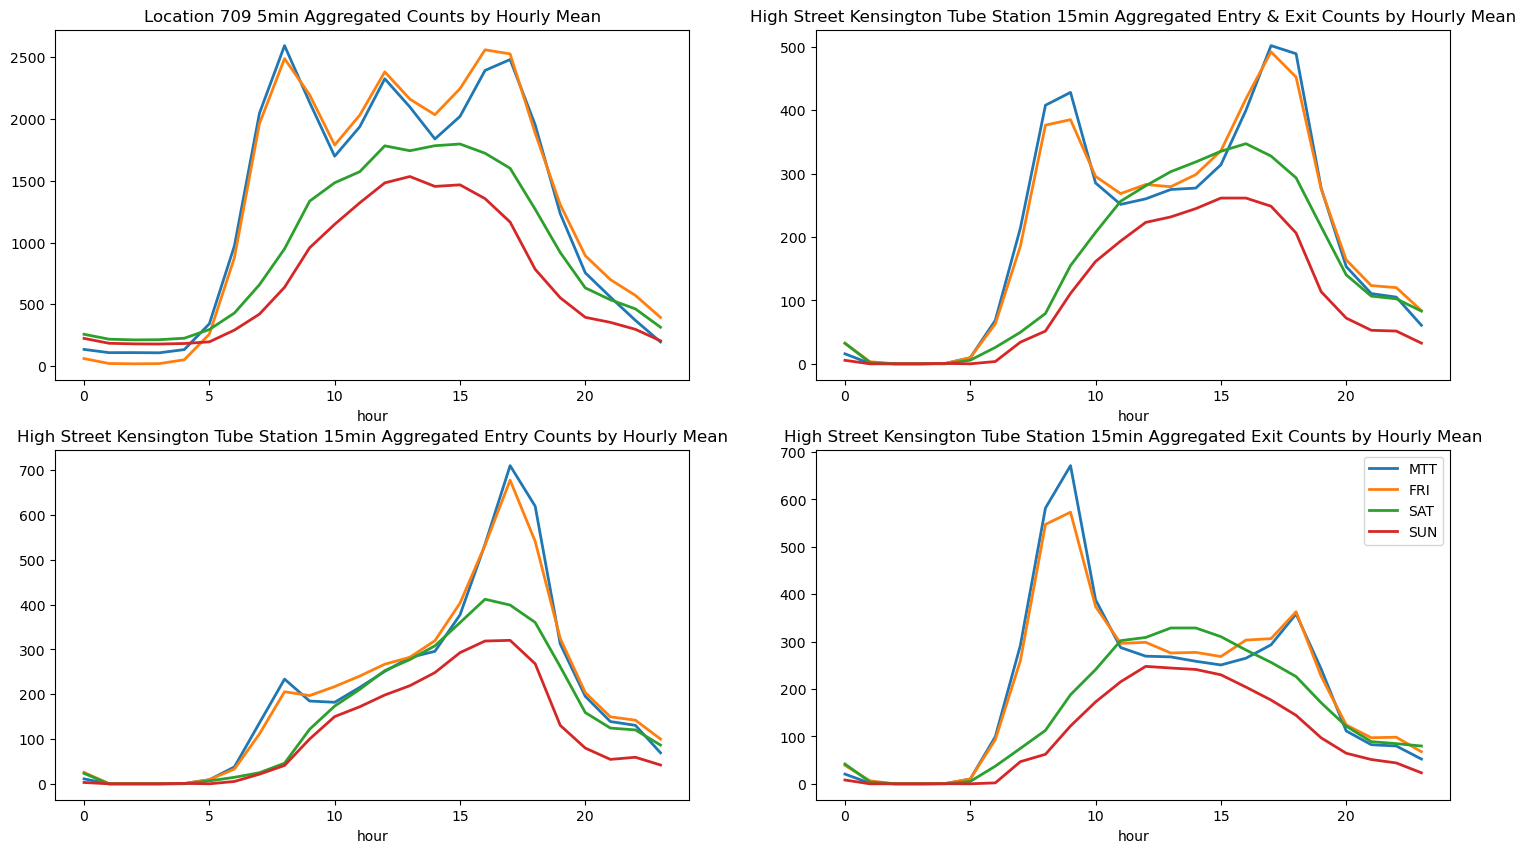

In [36]:
ComparisonPlot(709, 'High Street Kensington')

## Location 957
- Location: 98 Kensington High Street, London, W8 4SG, Greater London
- Type: External

No handles with labels found to put in legend.


    loc                    stat  day direct      corr
12  957  High Street Kensington  MTT     IN  0.812400
13  957  High Street Kensington  FRI     IN  0.829951
14  957  High Street Kensington  SAT     IN  0.895730
15  957  High Street Kensington  SUN     IN  0.915959
16  957  High Street Kensington  MTT    OUT  0.774745
17  957  High Street Kensington  FRI    OUT  0.820104
18  957  High Street Kensington  SAT    OUT  0.995715
19  957  High Street Kensington  SUN    OUT  0.991524
20  957  High Street Kensington  MTT   BOTH  0.907401
21  957  High Street Kensington  FRI   BOTH  0.919082
22  957  High Street Kensington  SAT   BOTH  0.969555
23  957  High Street Kensington  SUN   BOTH  0.974282


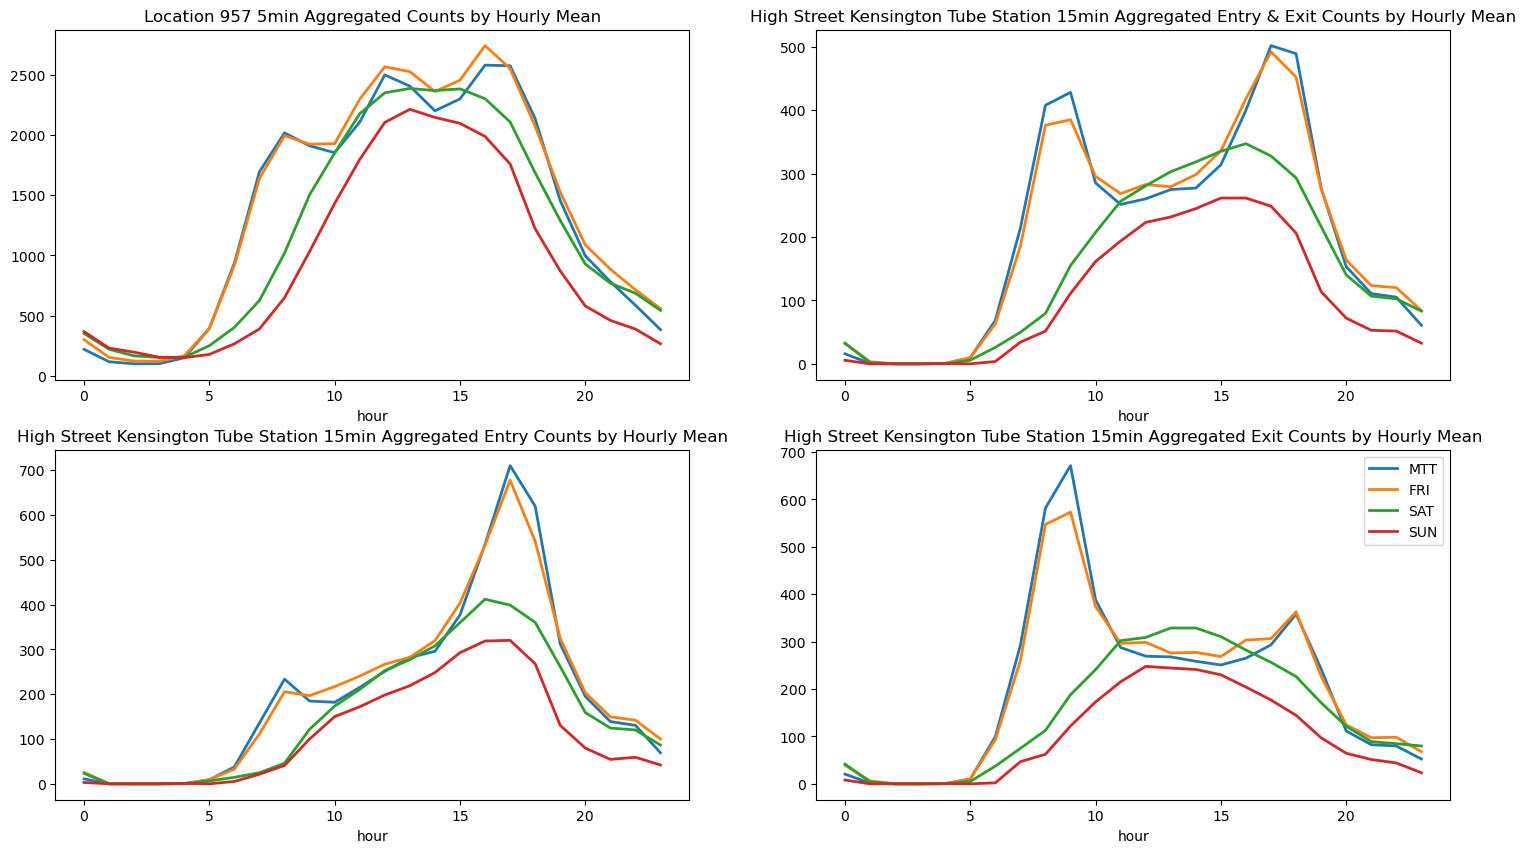

In [37]:
ComparisonPlot(957, 'High Street Kensington')

## Location 853
- Location: 267 Tottenham Court Road, London, W1T 7RQ, Greater London
- Type: External

No handles with labels found to put in legend.


    loc                  stat  day direct      corr
24  853  Tottenham Court Road  MTT     IN  0.690471
25  853  Tottenham Court Road  FRI     IN  0.624953
26  853  Tottenham Court Road  SAT     IN  0.616865
27  853  Tottenham Court Road  SUN     IN  0.805321
28  853  Tottenham Court Road  MTT    OUT  0.664924
29  853  Tottenham Court Road  FRI    OUT  0.719435
30  853  Tottenham Court Road  SAT    OUT  0.975593
31  853  Tottenham Court Road  SUN    OUT  0.917904
32  853  Tottenham Court Road  MTT   BOTH  0.873565
33  853  Tottenham Court Road  FRI   BOTH  0.845640
34  853  Tottenham Court Road  SAT   BOTH  0.896790
35  853  Tottenham Court Road  SUN   BOTH  0.964135


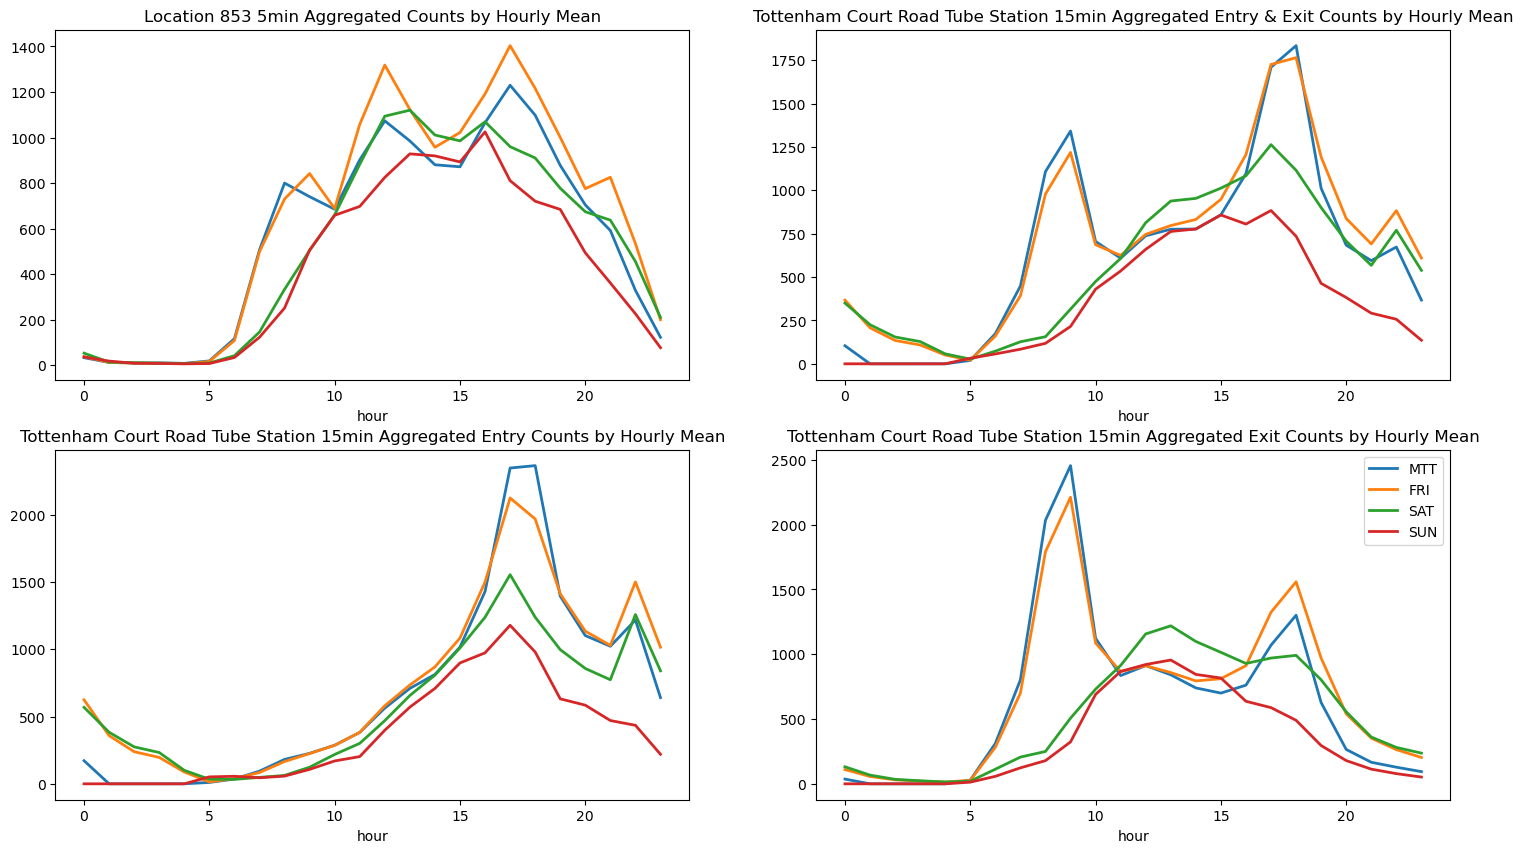

In [38]:
ComparisonPlot(853, 'Tottenham Court Road')

## Location 778
- Location: 248 Tottenham Court Road, London, W1T 7QZ, Greater London
- Type: External

No handles with labels found to put in legend.


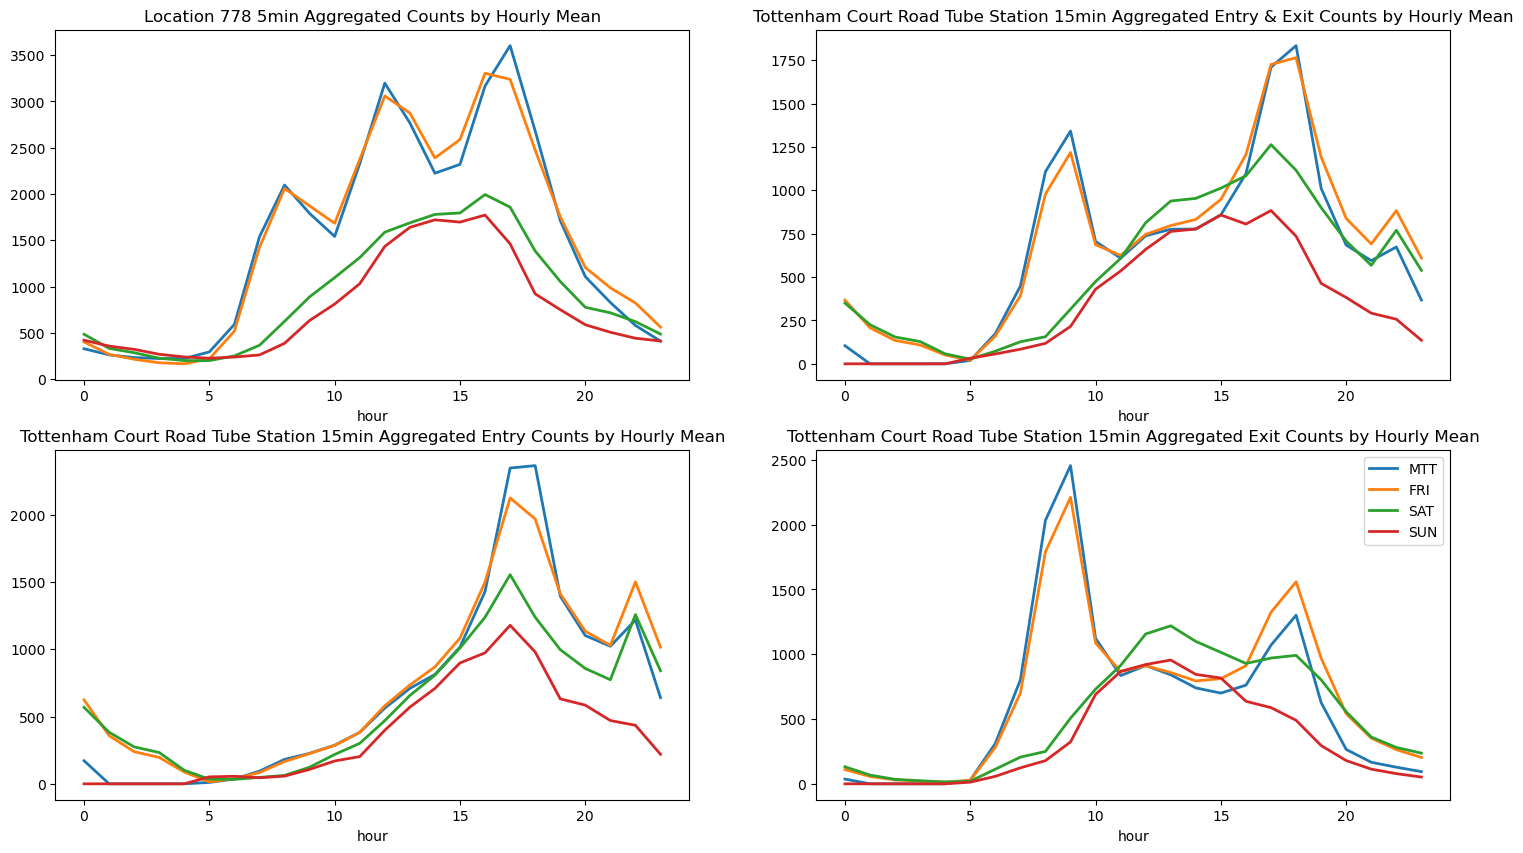

In [120]:
ComparisonPlot(778, 'Tottenham Court Road')

## Location 873
- Location: West One Shopping Centre, 375-381 Oxford Street, London, W1C 2JS, Greater London
- Type: External

No handles with labels found to put in legend.


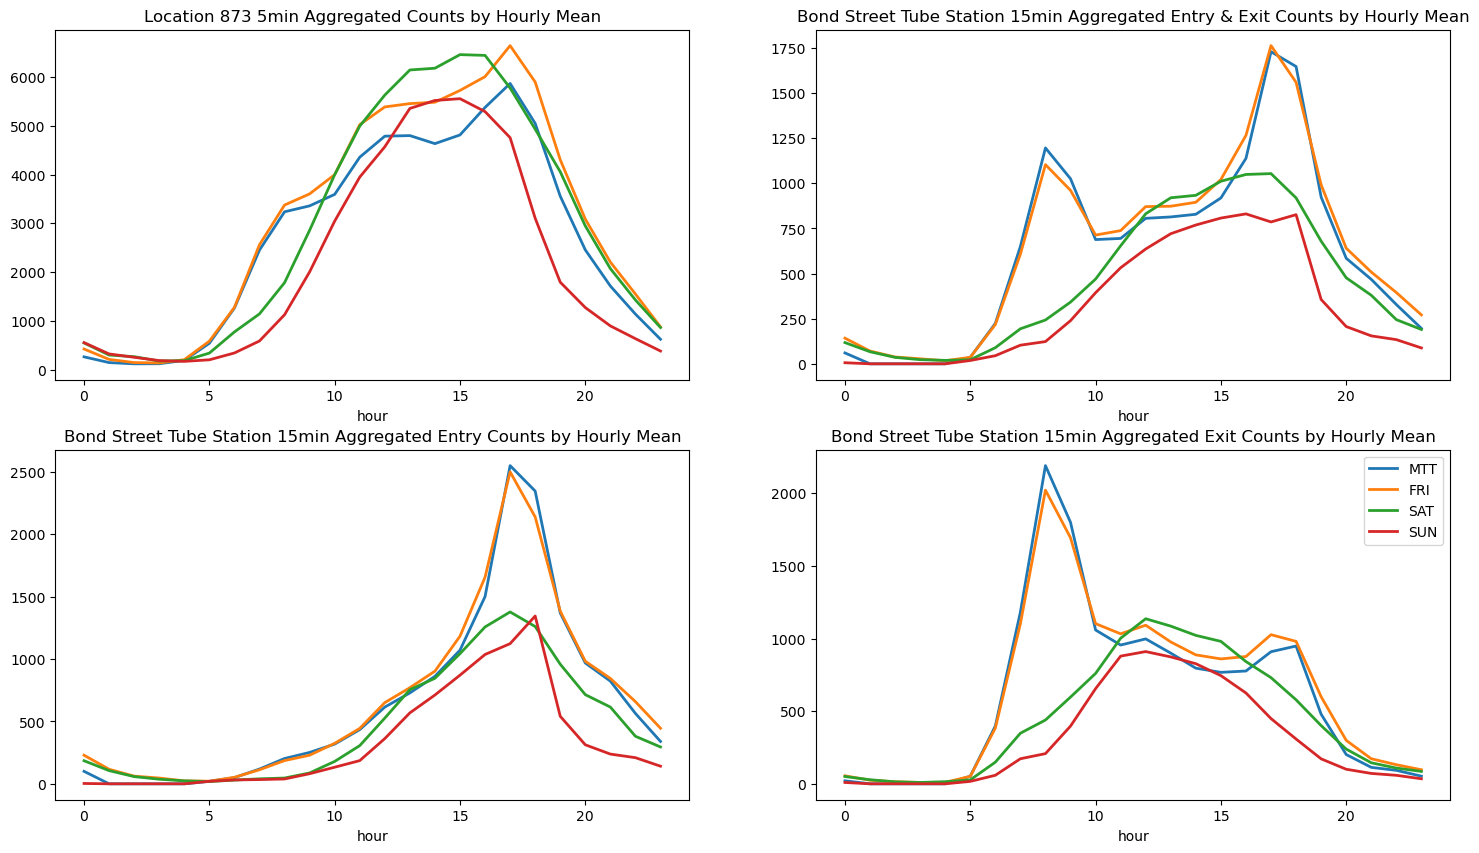

In [121]:
ComparisonPlot(873, 'Bond Street')

## Location 430
- Location: 10-12 James Street, London, W1U 1EE, Greater London
- Type: External

No handles with labels found to put in legend.


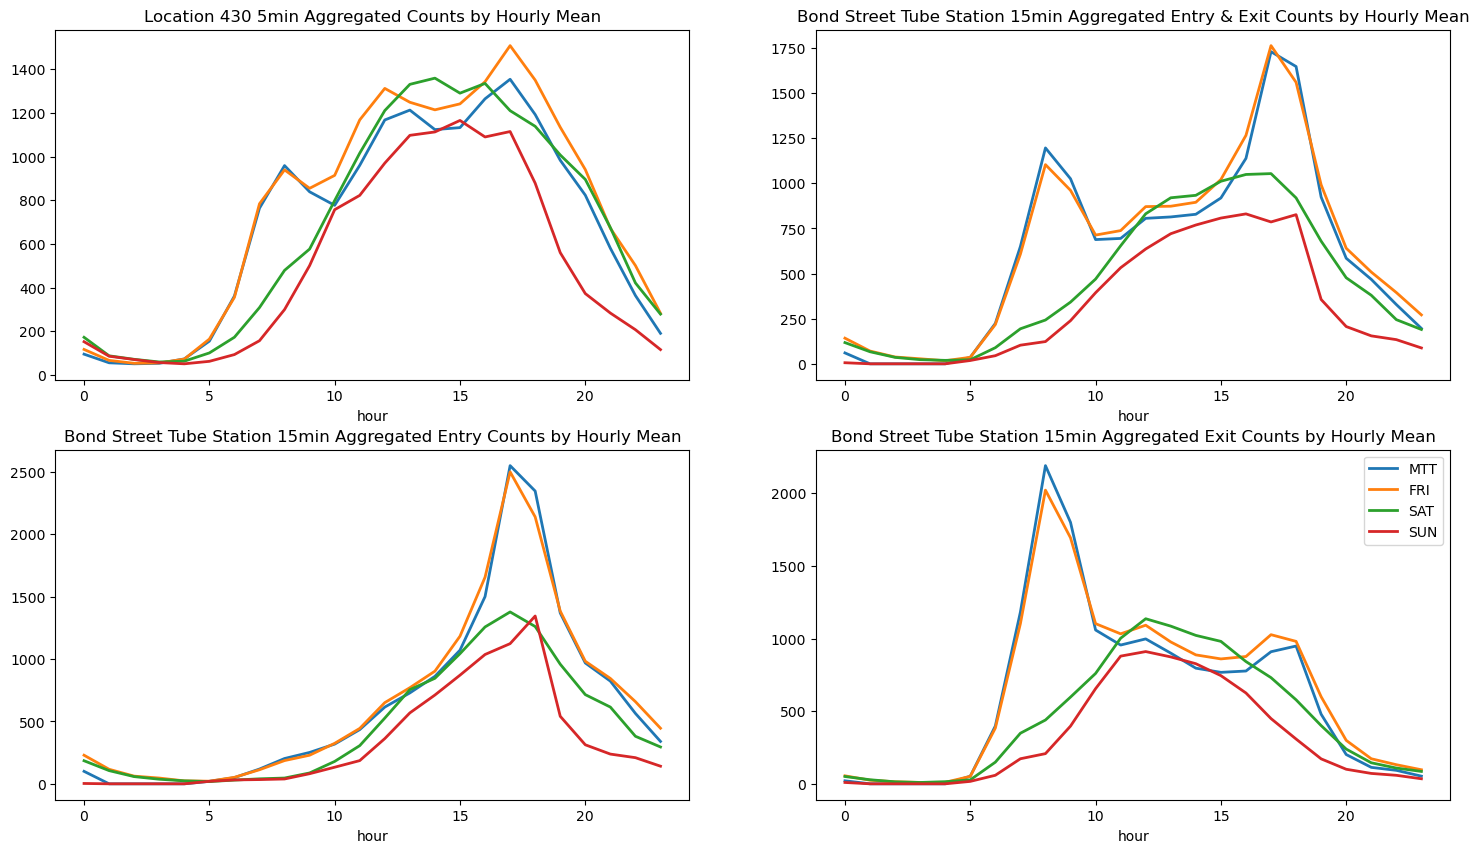

In [6]:
ComparisonPlot(430, 'Bond Street')

## Location 759
- Location: 55 Brompton Road, London, SW3 1DP, Greater London
- Type: External

No handles with labels found to put in legend.


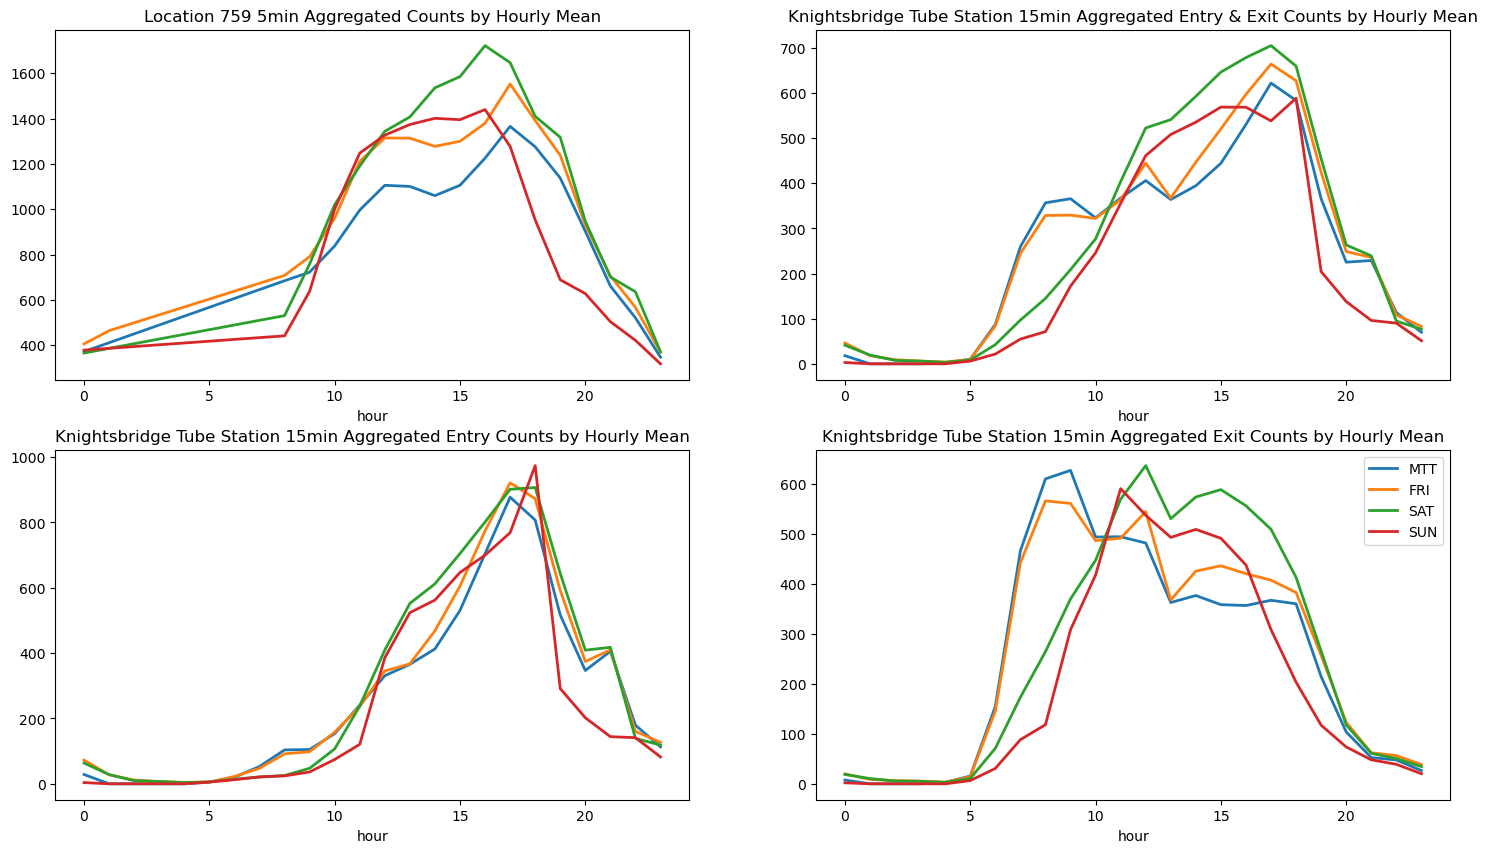

In [123]:
ComparisonPlot(759, 'Knightsbridge')

## Location 871
- Location: Unit 25-26, Gloucester Arcade, Gloucester Road, London, SW7 4SF, Greater London
- Type: External

No handles with labels found to put in legend.


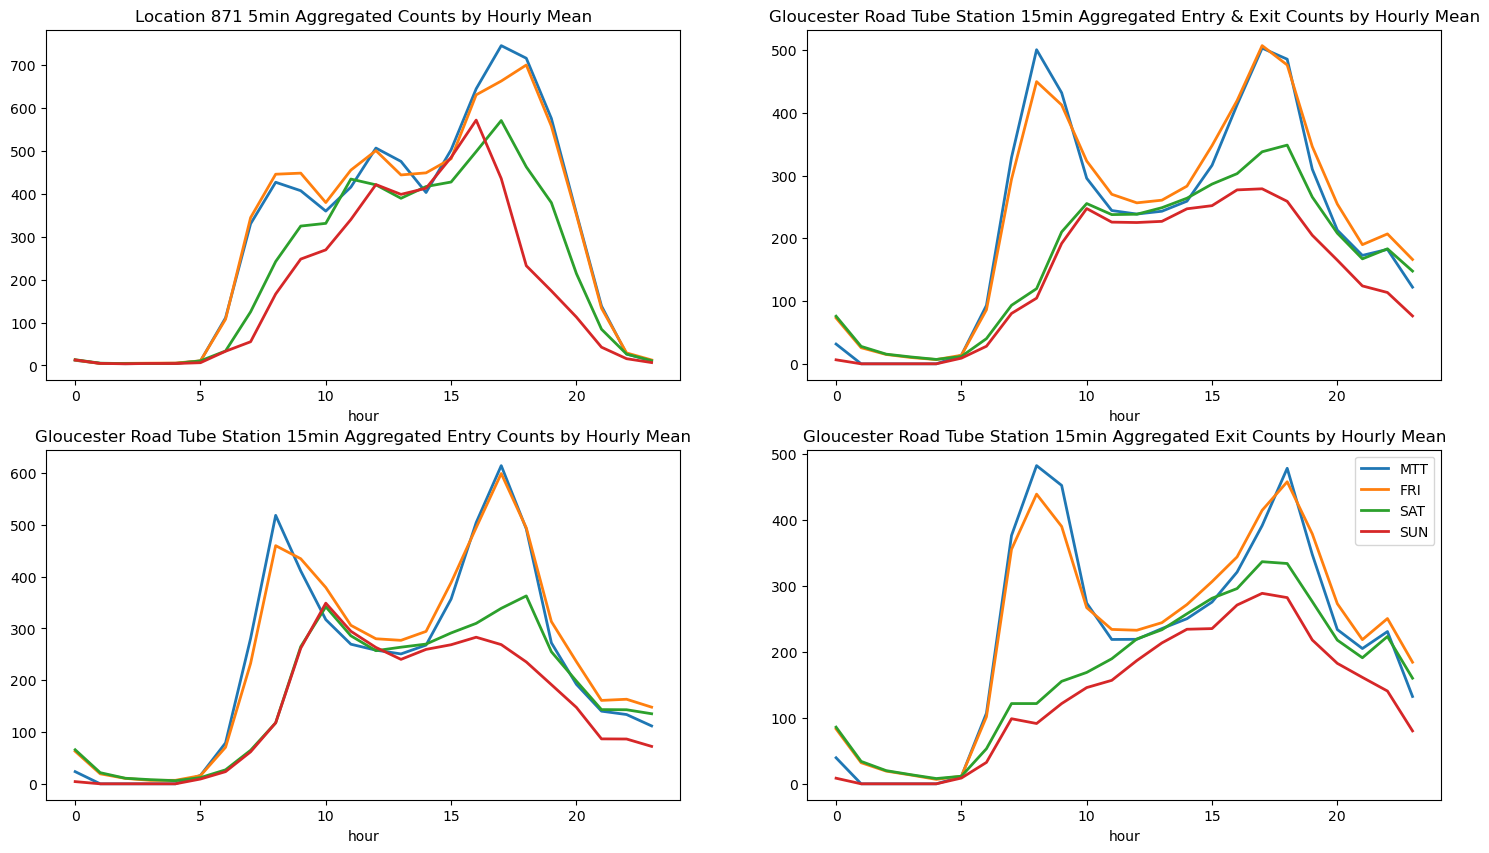

In [124]:
ComparisonPlot(871, 'Gloucester Road')

## Location 982
- Location: 13 Regent Street, London, SW1Y 4LR, Greater London
- Type: External

No handles with labels found to put in legend.


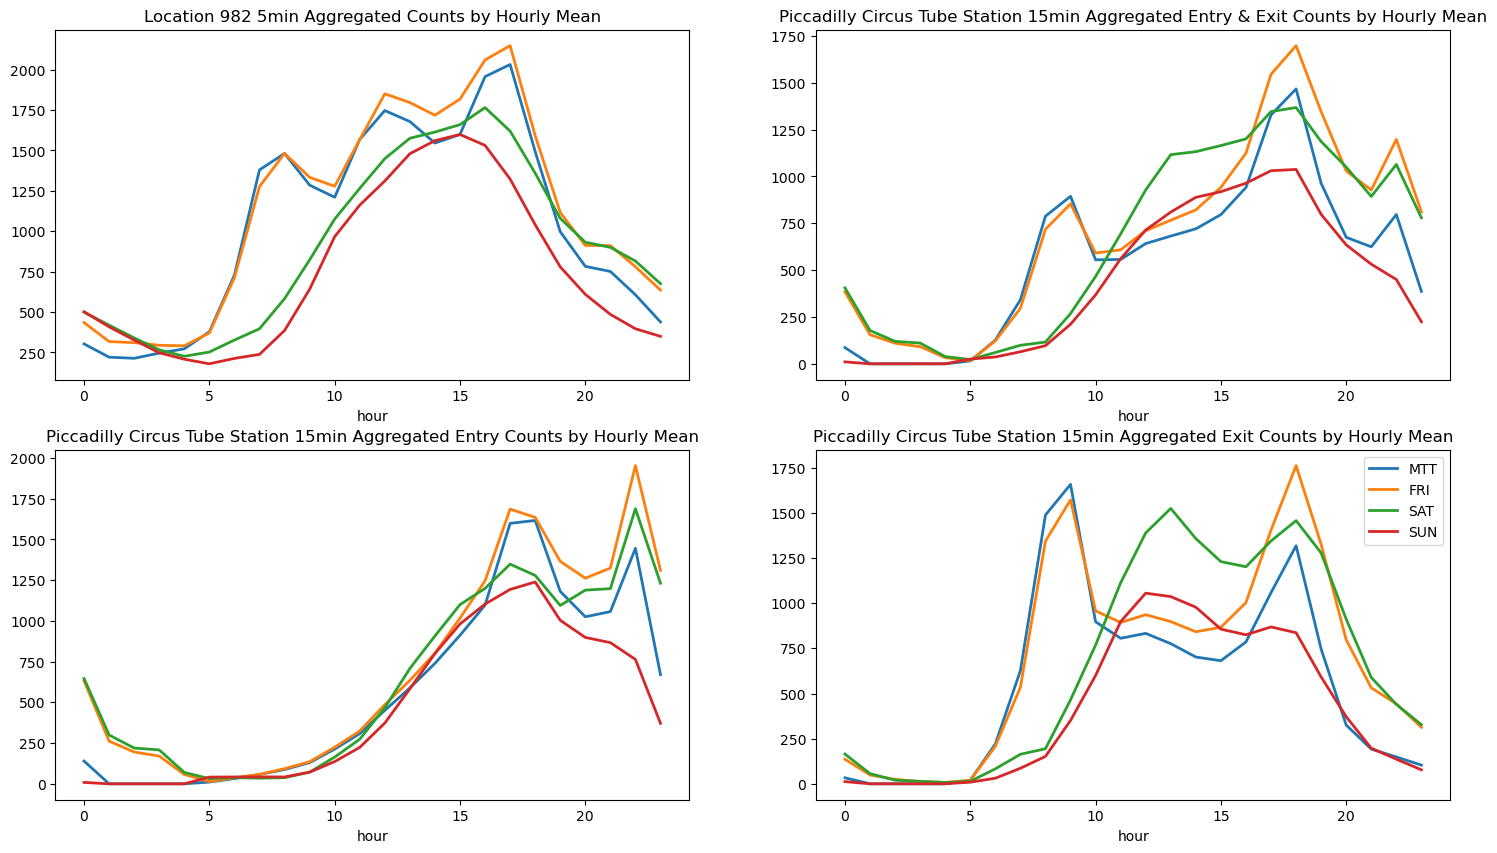

In [125]:
ComparisonPlot(982, 'Piccadilly Circus')

## Location 983
- Location: 435 Strand, London, WC2R 0QN, Greater London
- Type: External

No handles with labels found to put in legend.


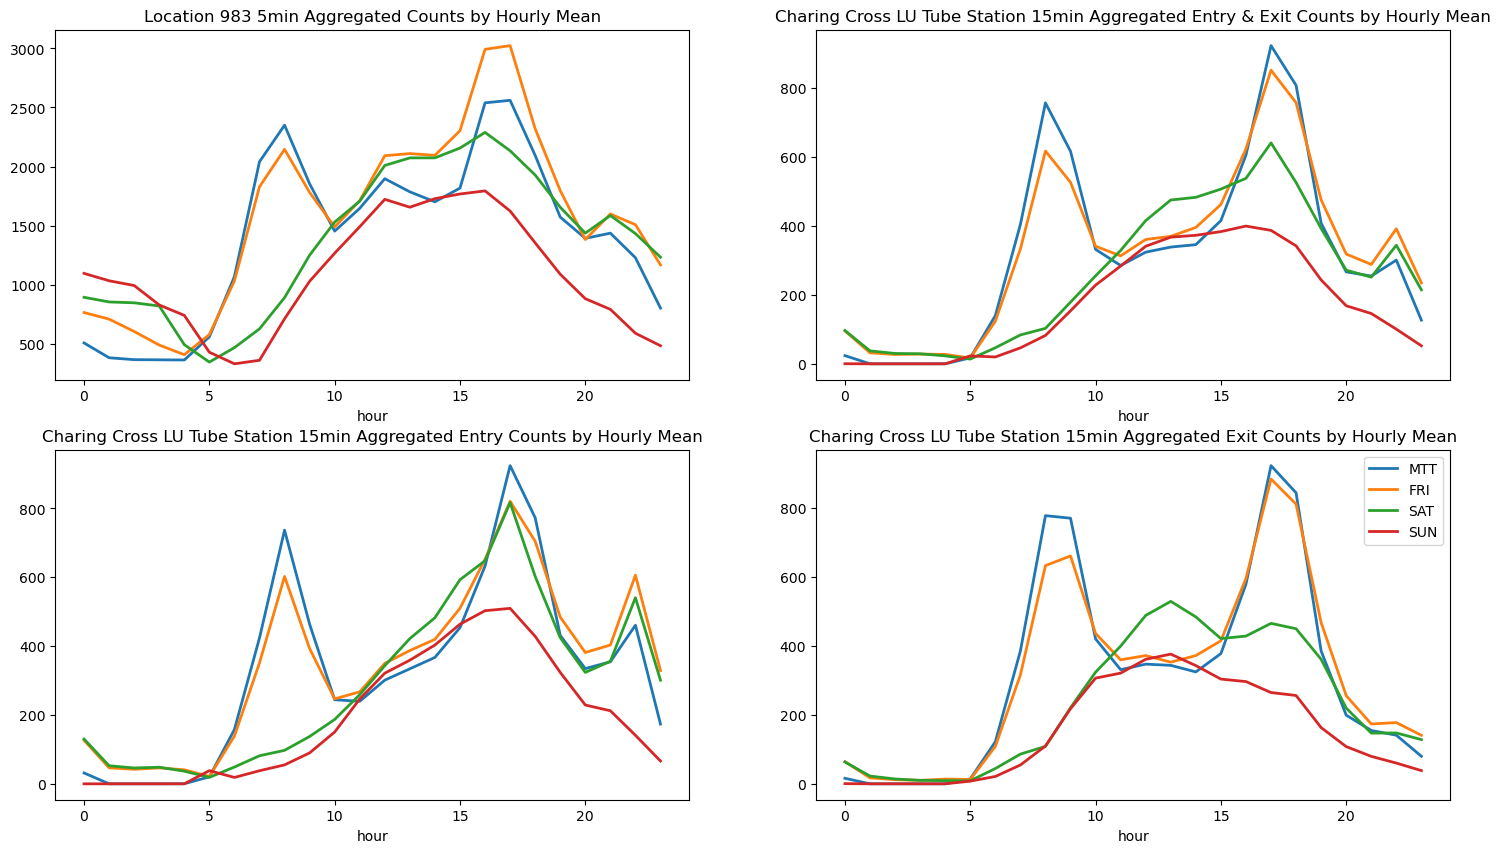

In [126]:
ComparisonPlot(983, 'Charing Cross LU')

## Location 108
- Location: Unit 3, 145 Tottenham Court Road, London, W1T 7NE, Greater London
- Type: External

No handles with labels found to put in legend.


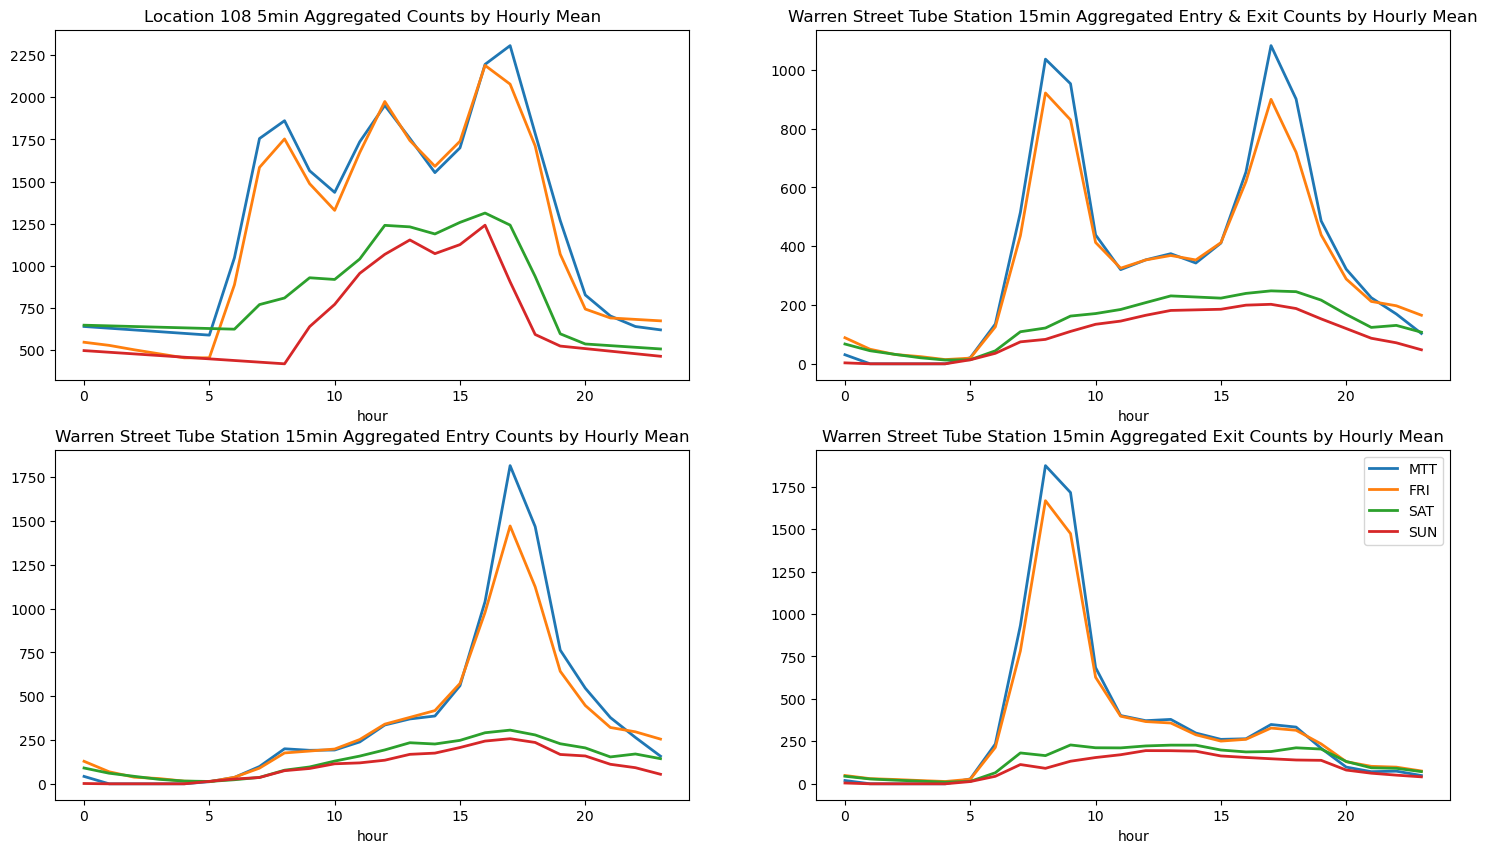

In [138]:
ComparisonPlot(108, 'Warren Street')

## Location 127
- Location: 27 Sackville Street, London, W1S 3DT, Greater London
- Type: External

No handles with labels found to put in legend.


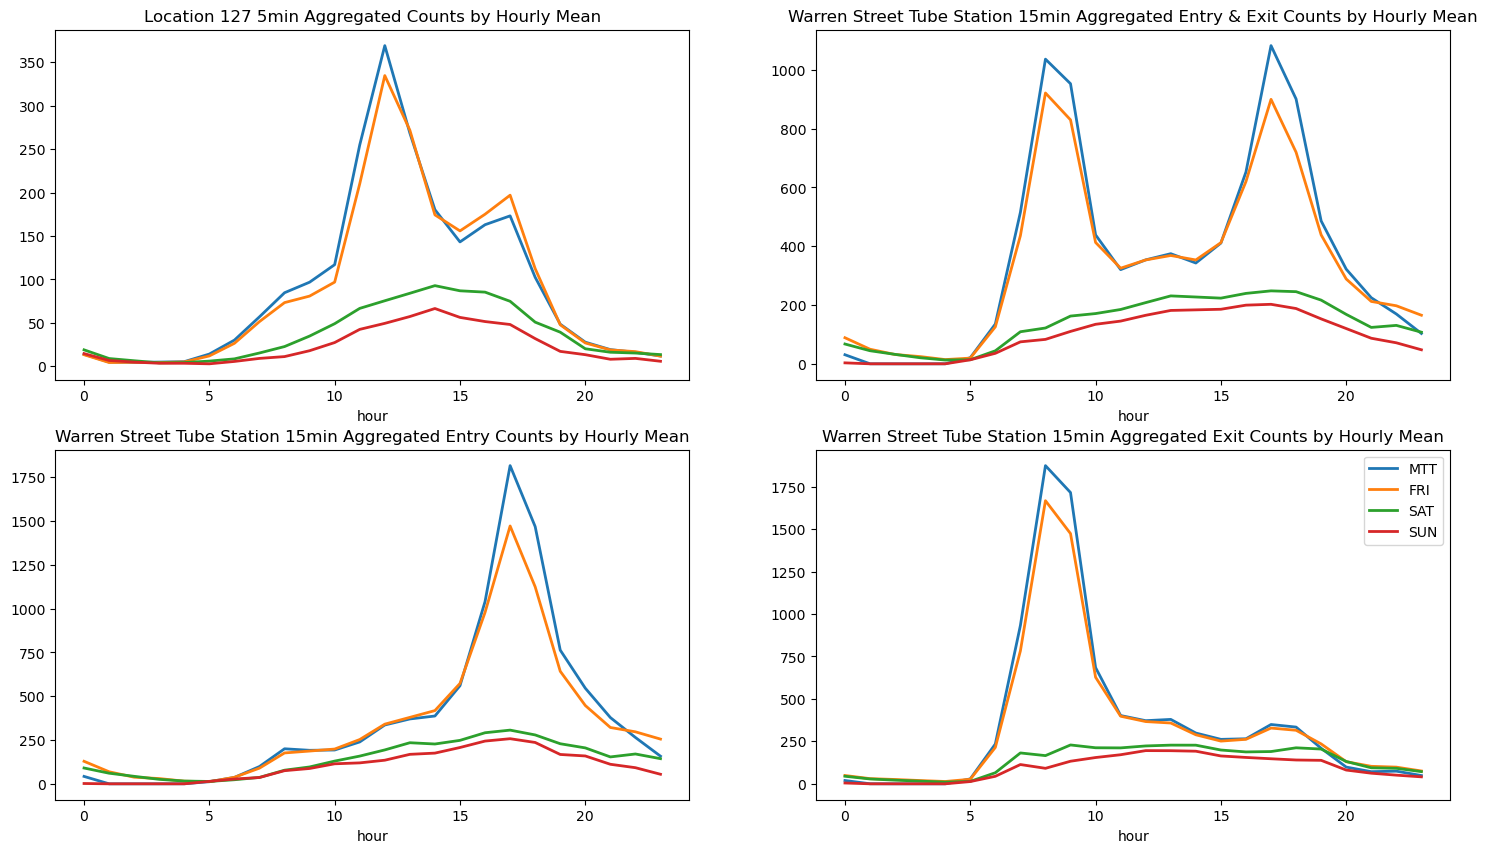

In [128]:
ComparisonPlot(127, 'Warren Street')

## Location 119
- Location: 140-141 Park Lane, London, W1K 7AA, Greater London
- Position: Marble Arch Park
- Type: External

No handles with labels found to put in legend.


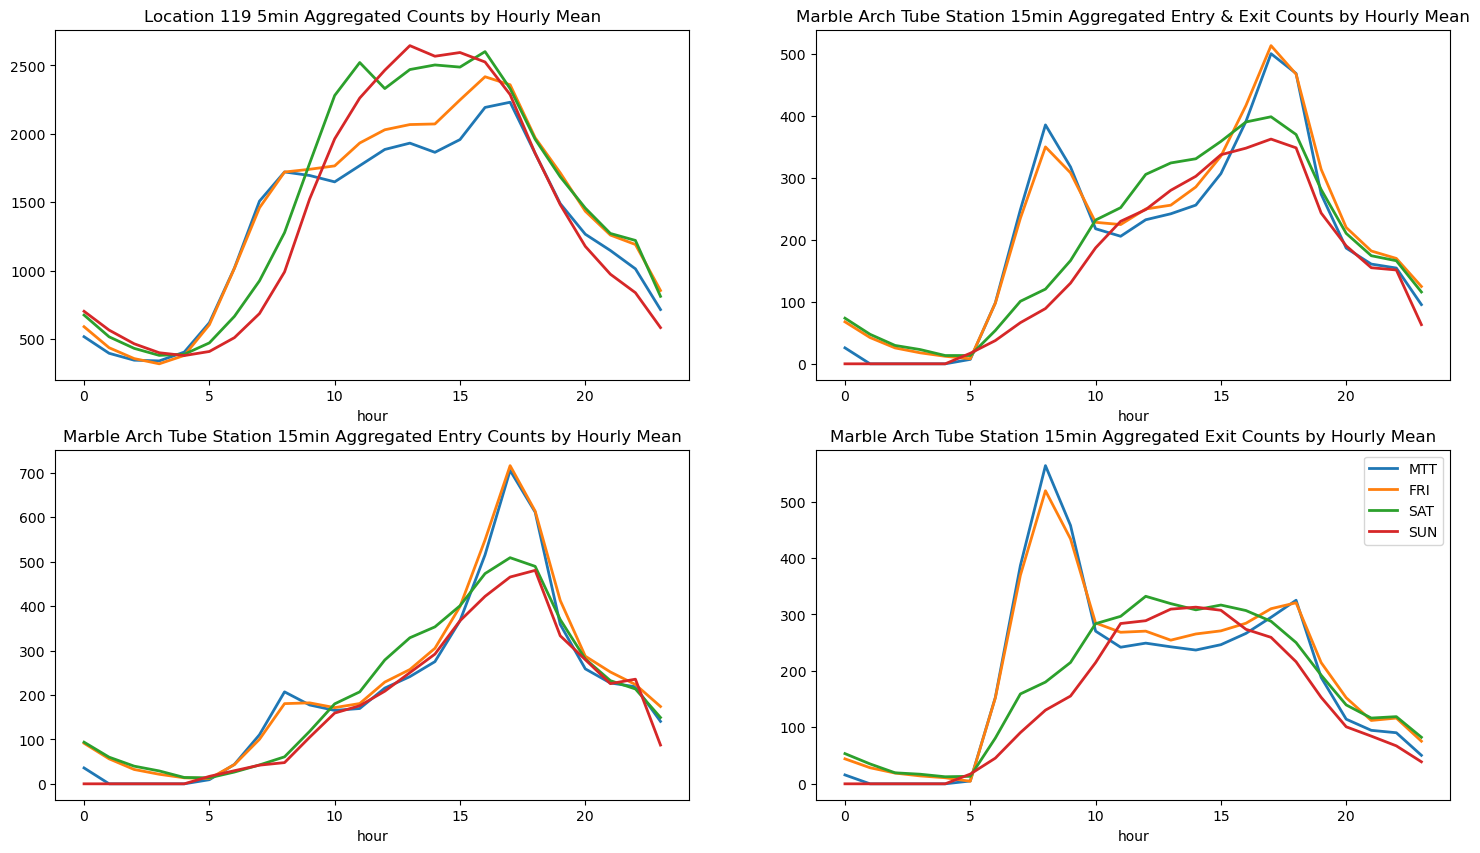

In [129]:
ComparisonPlot(119, 'Marble Arch')

## Location 357
- Location: 13 New Quebec Street, London, W1H 7RR, Greater London
- Type: External

No handles with labels found to put in legend.


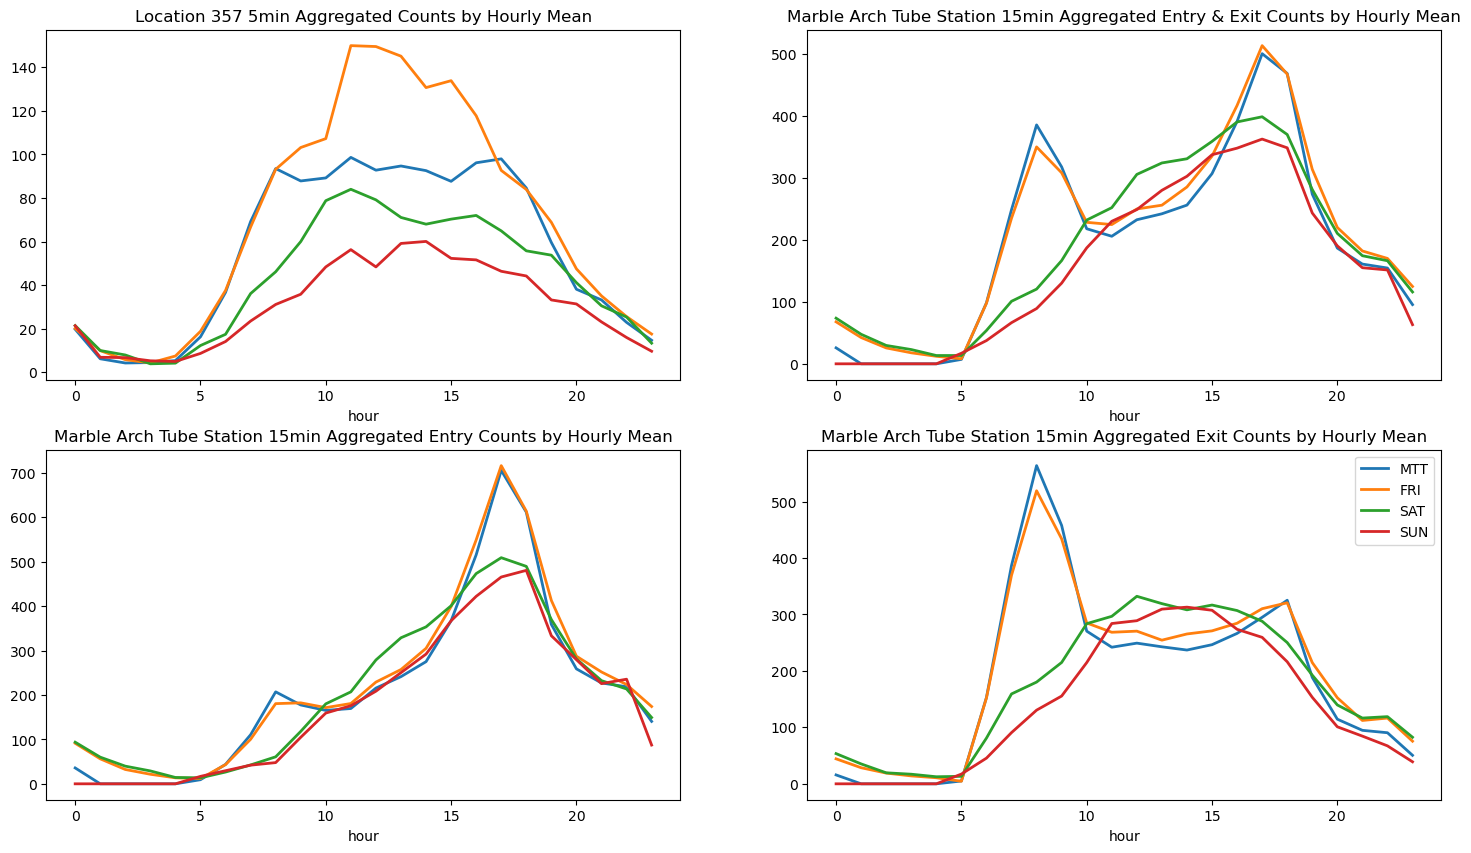

In [130]:
ComparisonPlot(357, 'Marble Arch')

## Location 986
- Location: 52 George Street, Richmond Upon Thames, TW9 1HJ, Greater London
- Type: External

No handles with labels found to put in legend.


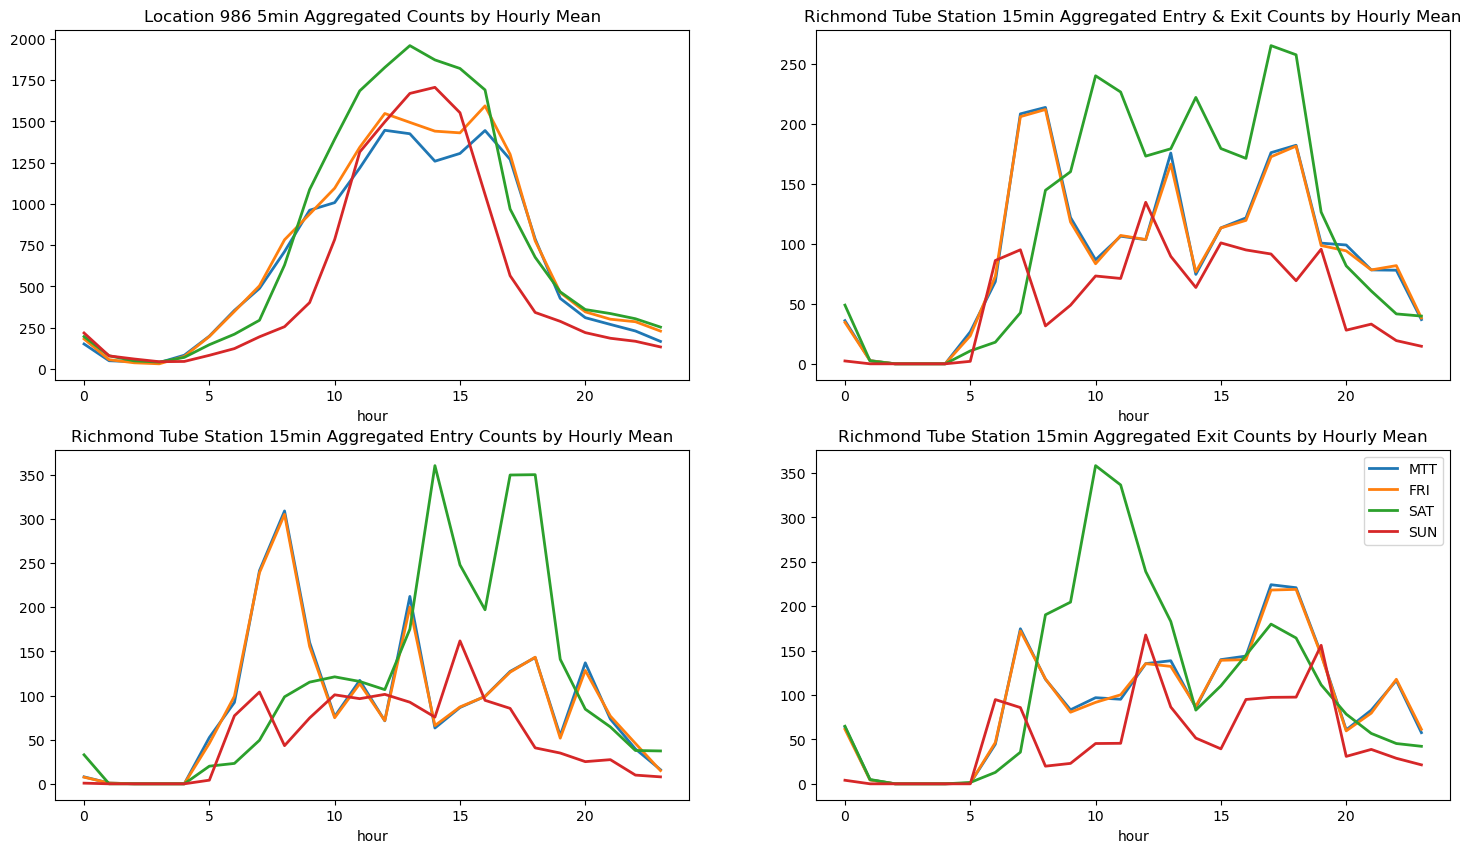

In [131]:
ComparisonPlot(986, 'Richmond')

## Location 988
- Location: 27 The Broadway, London, SW19 1PS, Greater London
- Type: External

No handles with labels found to put in legend.


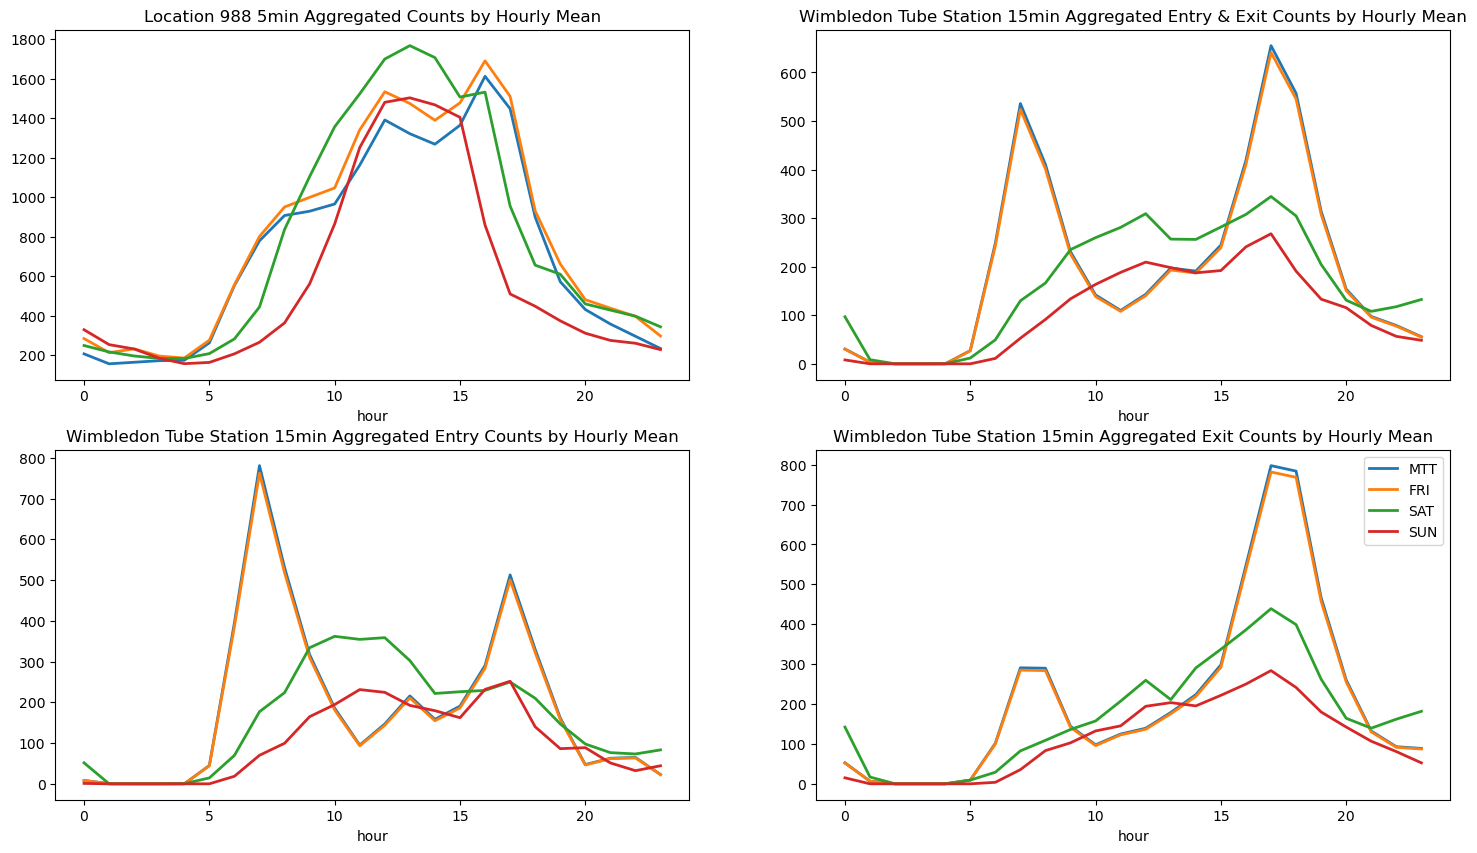

In [132]:
ComparisonPlot(988, 'Wimbledon')

## Location 97
- Location: 33-39 Tooting High Street, London, SW17 0SP, Greater London
- Type: External

No handles with labels found to put in legend.


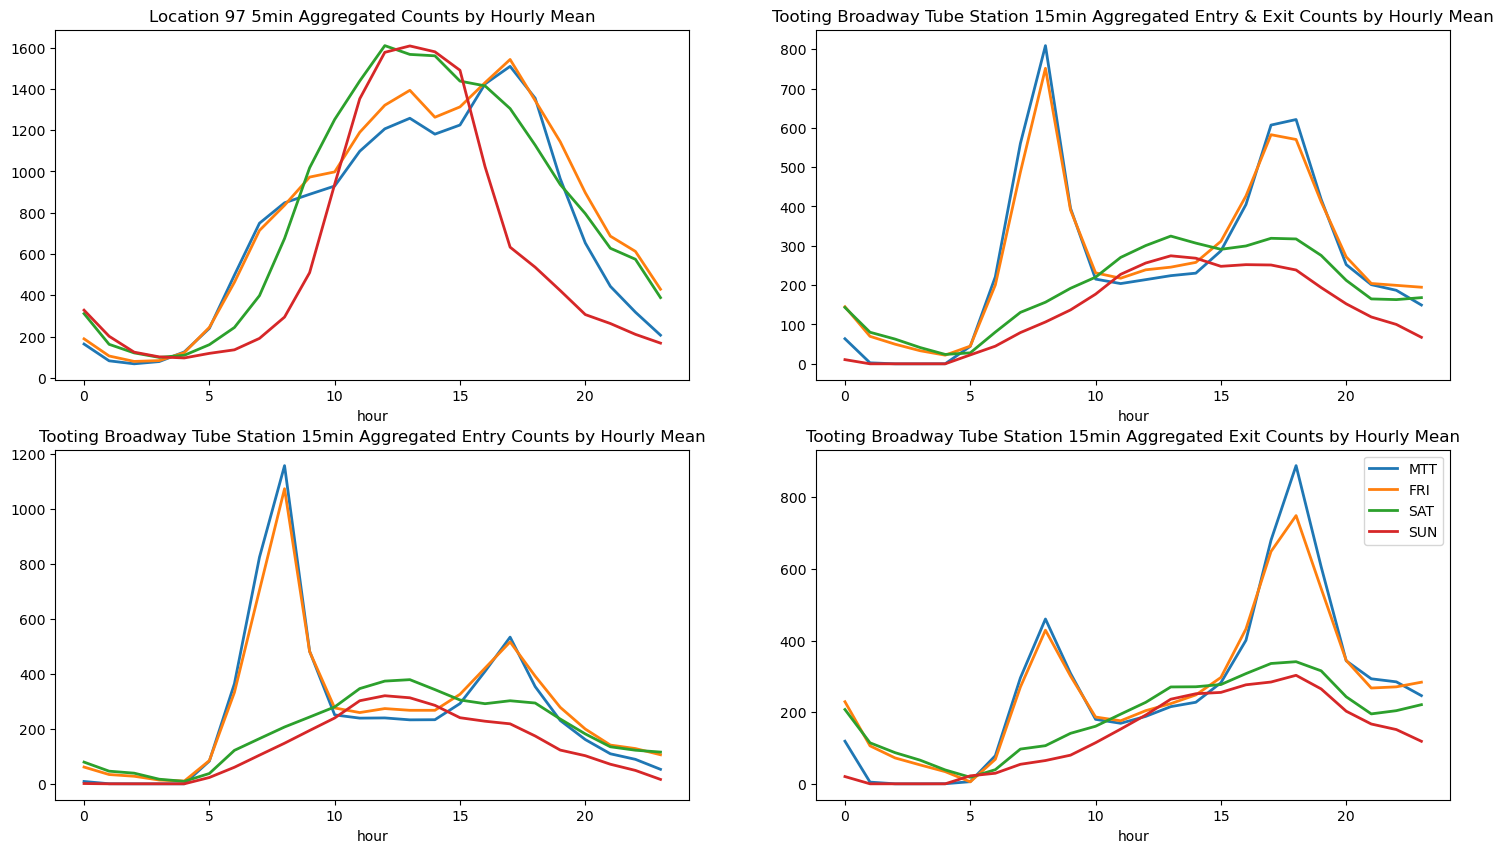

In [133]:
ComparisonPlot(97, 'Tooting Broadway')

## Location 877
- Location: 12 Electric Avenue, London, SW9 8JX, Greater London
- Type: External

No handles with labels found to put in legend.


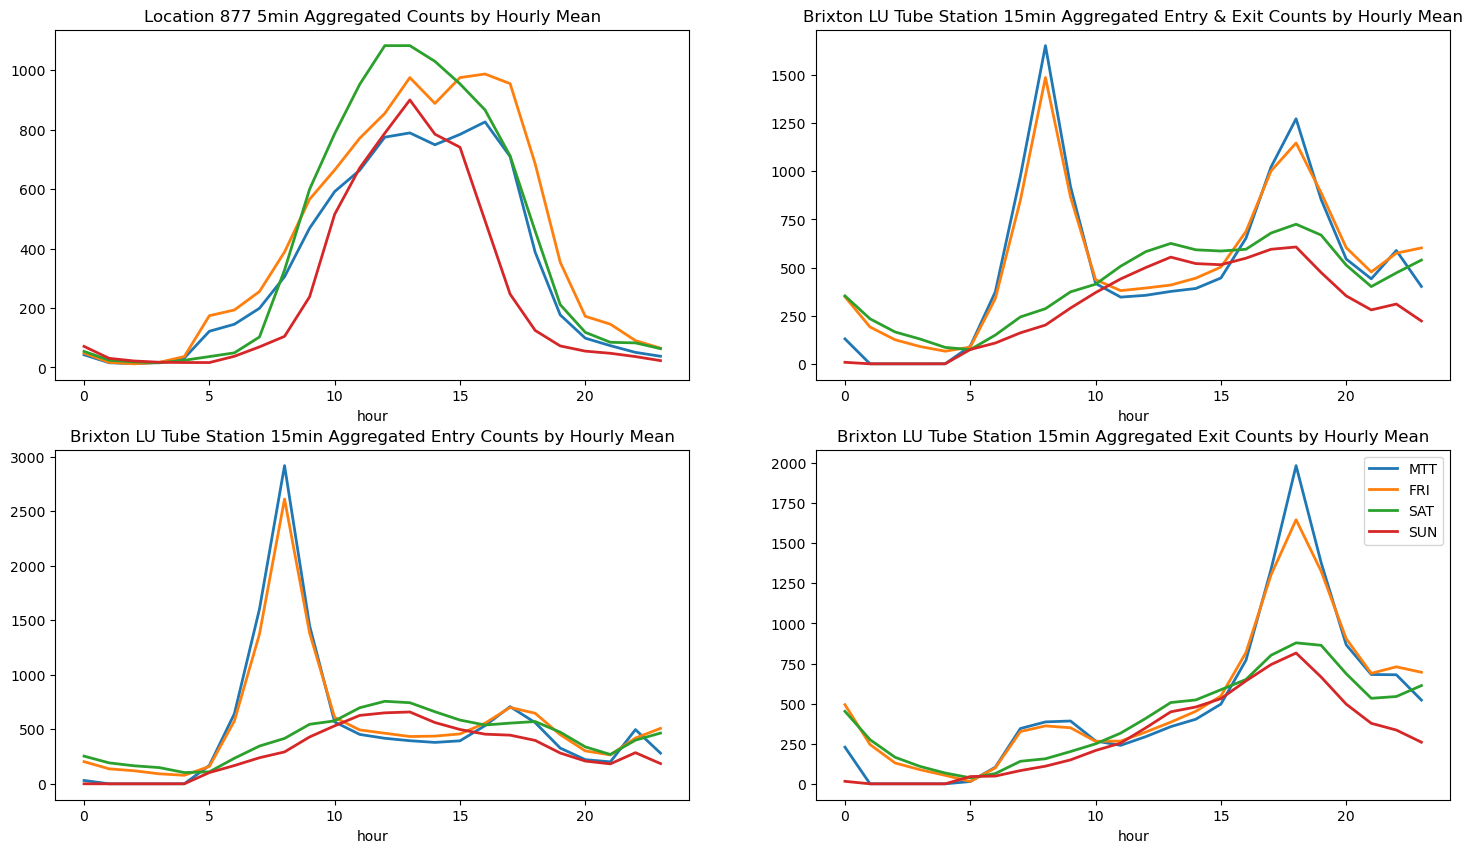

In [134]:
ComparisonPlot(877, 'Brixton LU')

## Location 879
- Location: 451-453 Brixton Road, London, SW9 8HH, Greater London
- Type: External

No handles with labels found to put in legend.


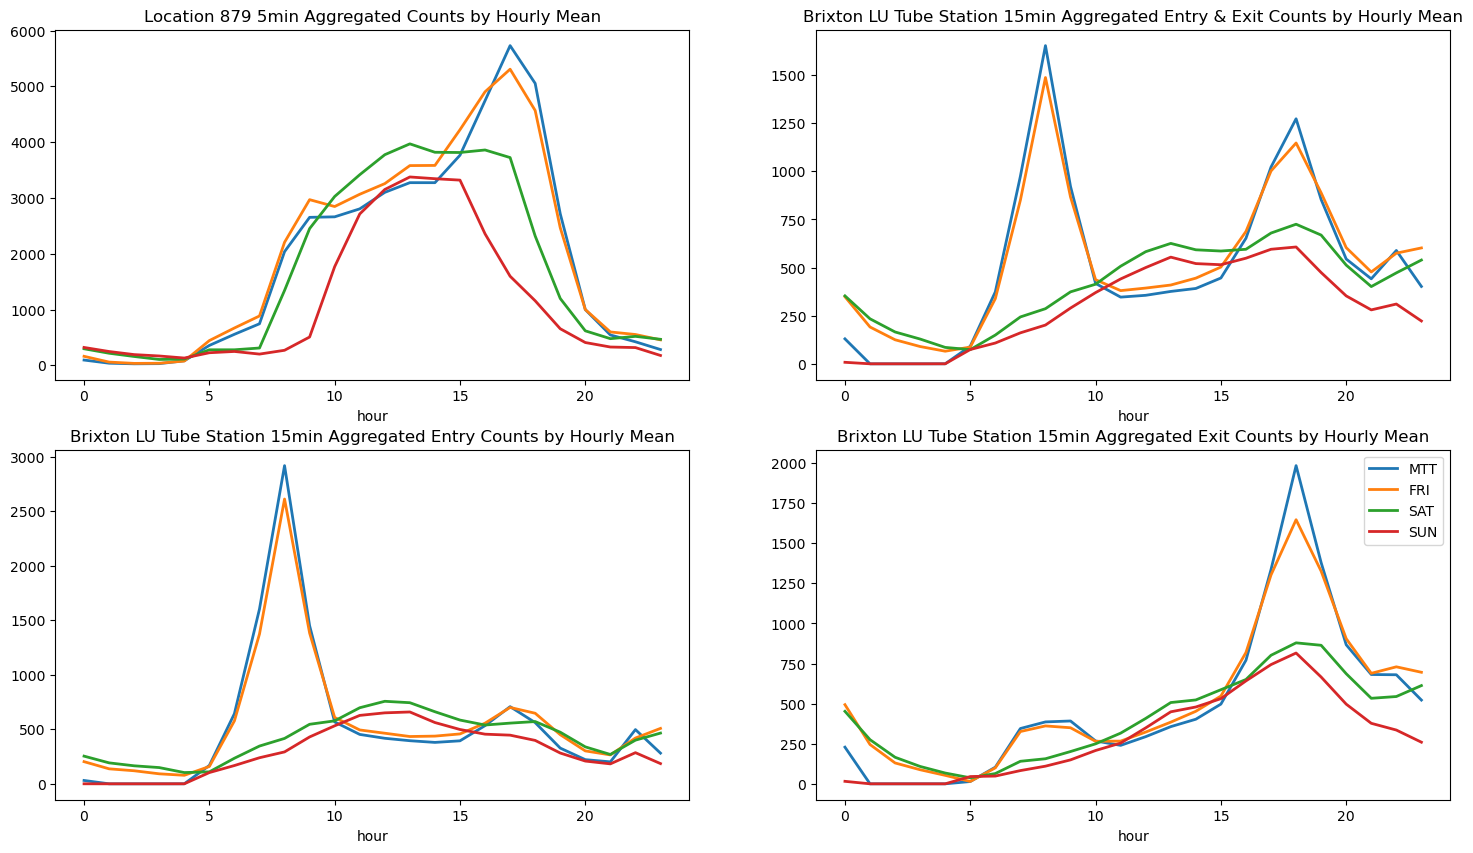

In [135]:
ComparisonPlot(879, 'Brixton LU')

## Location 574
- Location: 29-30 High Holborn, London, WC1V 6AZ, Greater London
- Position: Holborn
- Type: External

No handles with labels found to put in legend.


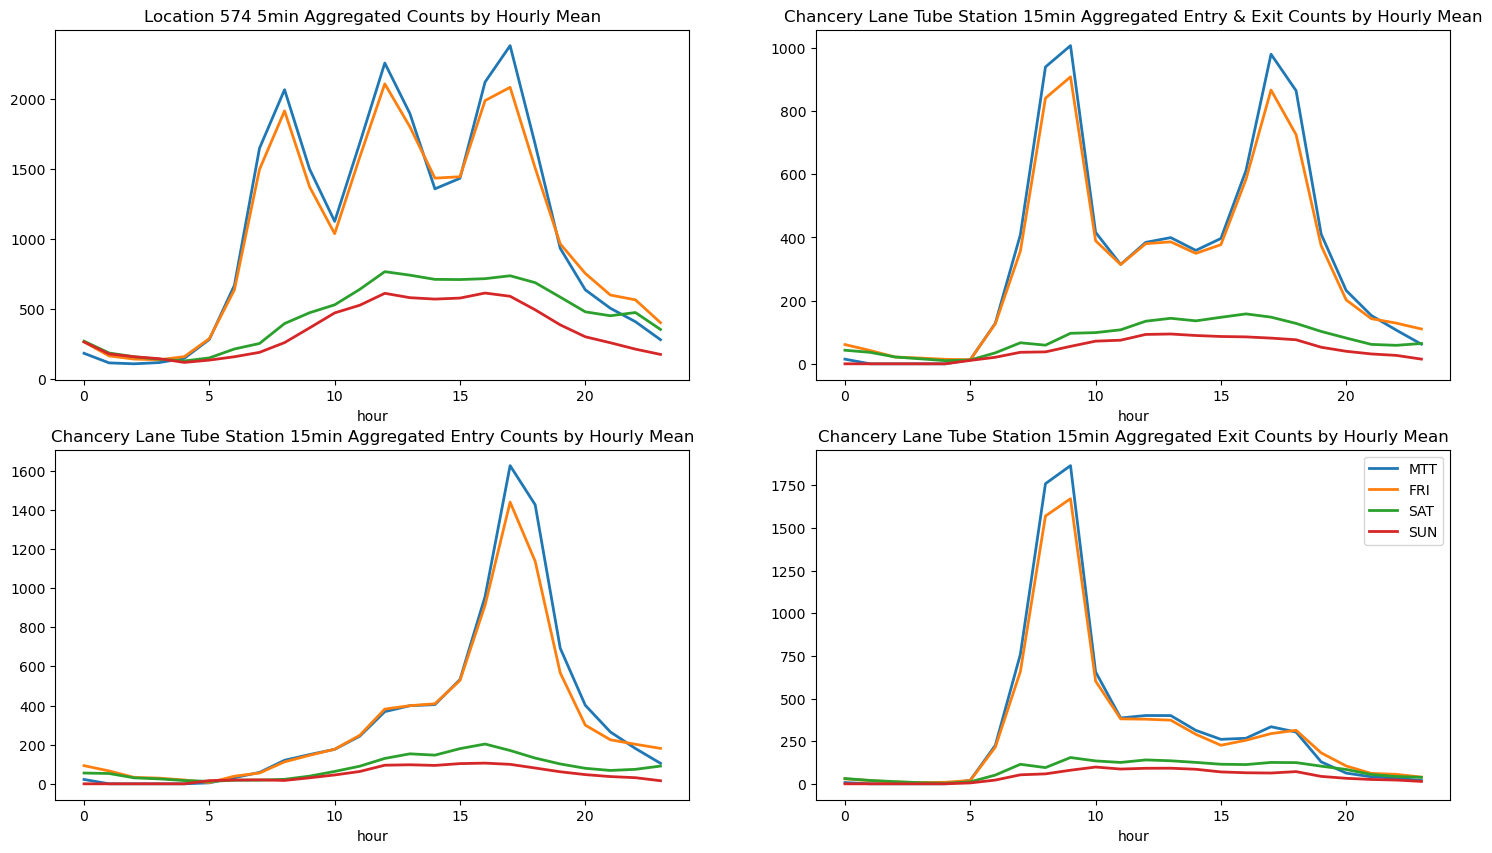

In [136]:
ComparisonPlot(574, 'Chancery Lane')

# Batch Operation

In [7]:
corr = pd.DataFrame({'loc':[], 'stat':[], 'day':[], 'direct':[], 'corr':[]})
corr.to_csv('corr.csv')

In [8]:
dist = pd.read_csv('dist_edited.csv')
dist

location               Name    dist  \
0          5  Hammersmith (H&C)   84.35   
1          6  Hammersmith (DIS)   77.30   
2          7  Hammersmith (DIS)   75.70   
3         62  Hammersmith (DIS)   98.30   
4         78  Hammersmith (H&C)  116.04   
..       ...                ...     ...   
83       996      Golders Green   82.22   
84      1026     Paddington TfL  400.73   
85      1115     Hendon Central  609.20   
86      1116    Ealing Broadway  219.01   
87      1166        Victoria LU  399.17   

                                              address       lat      lon  \
0   Unit 35, Hammersmith Broadway Shopping Centre,...  51.49273 -0.22426   
1   Unit 11, Hammersmith Broadway Shopping Centre,...  51.49215 -0.22356   
2   Unit 13-16, Hammersmith Broadway Shopping Cent...  51.49171 -0.22361   
3   Unit 9, Hammersmith Broadway Shopping Centre, ...  51.49226 -0.22374   
4   Unit 3, Hammersmith Broadway Shopping Centre, ...  51.49255 -0.22395   
..                                                ...       ...      ...   
83  3 Golders Green Road, London, NW11 8DY, Greate...  51.57181 -0.19555   
84  40-42 Craven Road, London, W2 3QA, Greater London  51.51364 -0.17934   
85  Unit 31, Brent Cross Shopping Centre, Prince C...  51.57751 -0.22439   
86  Unit kiosk 2, Ealing Broadway Shopping Centre,...  51.51298 -0.30313   
87  149-151 Victoria Street, London, SW1E 5NH, Gre...  51.49683 -0.13995   

                                             position      type  
0                                King Street entrance  External  
1   Hammersmith Underground Station - Talgarth Roa...  External  
2                              Talgarth Road entrance  External  
3                           Bus station link corridor  External  
4   Hammersmith Underground Station - King Street ...  External  
..                                                ...       ...  
83                                                     External  
84                                                     External  
85                                                     External  
86                                                     External  
87                                                     External  

[88 rows x 8 columns]

In [ ]:
for i in range(len(dist)):
    ComparisonPlot(dist.location[i], dist.Name[i])

In [ ]:
# corr0218.csv
# visualization

## Choose some famous landmarks

google popular times
- loc710 Oxford Circus-Regent St
- loc575 Brunswick Centre
- loc709 High Street Kensington - Kensignton Arcade
- loc119 Marble Arch Park
- loc713 Tottenham Court Walk 
- loc982 Piccadilly Circus - 13 Regent Street